# Assignment 1

## Importing modules

In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [228]:
titanic = pd.read_csv('Titanic_Dataset.csv')

In [229]:
titanic.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S
46,47,0,3,"Lennon, Mr. Denis",male,NaN,1,0,370371,15.5000,NaN,Q
89,90,0,3,"Celotti, Mr. Francesco",male,24.0,0,0,343275,8.0500,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S
348,349,1,3,"Coutts, Master. William Loch ""William""",male,3.0,1,1,C.A. 37671,15.9000,NaN,S
768,769,0,3,"Moran, Mr. Daniel J",male,NaN,1,0,371110,24.1500,NaN,Q
314,315,0,2,"Hart, Mr. Benjamin",male,43.0,1,1,F.C.C. 13529,26.2500,NaN,S
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.2000,NaN,C
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5000,NaN,S


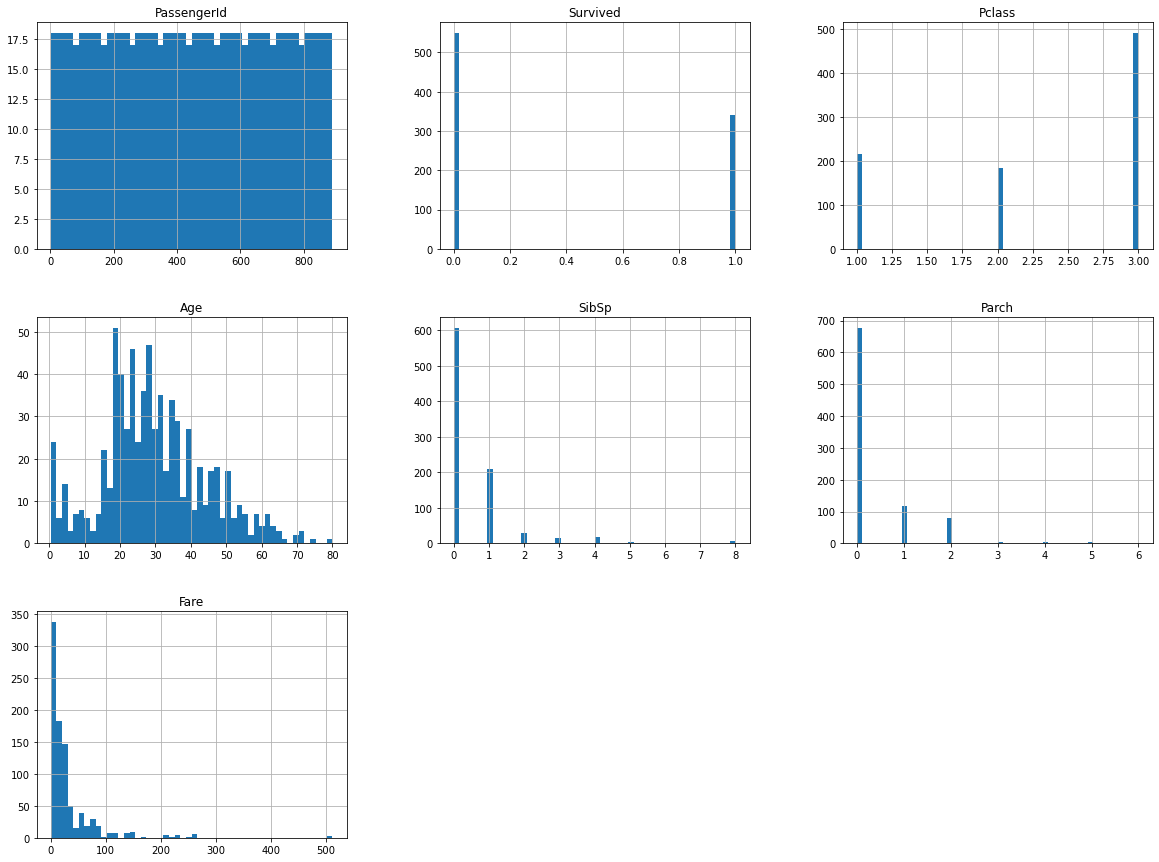

In [230]:
titanic.hist(bins=50, figsize=(20,15))
plt.show()

In [231]:
#train test split
from sklearn.model_selection import train_test_split
training_set,test_set=train_test_split(titanic,test_size=.2, random_state=42)

In [232]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          572 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        159 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB



##
## Handling the Missing Data

## Imputing missing values using mode 

In [233]:
from sklearn.impute import SimpleImputer
imputer_cat=SimpleImputer(strategy='median')

### Imputing the `Age` values. We will be using the mode for the missing values as I believe that would be the best representation considering the slight skew on the graph

In [234]:
titanic['Age']=imputer_cat.fit_transform(titanic[['Age']])

In [235]:
titanic.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
747,748,1,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0000,NaN,S
473,474,1,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23.0,0,0,SC/AH Basle 541,13.7917,D,C
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
306,307,1,1,"Fleming, Miss. Margaret",female,28.0,0,0,17421,110.8833,NaN,C
375,376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,28.0,1,0,PC 17604,82.1708,NaN,C
582,583,0,2,"Downton, Mr. William James",male,54.0,0,0,28403,26.0000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
283,284,1,3,"Dorking, Mr. Edward Arthur",male,19.0,0,0,A/5. 10482,8.0500,NaN,S
663,664,0,3,"Coleff, Mr. Peju",male,36.0,0,0,349210,7.4958,NaN,S
404,405,0,3,"Oreskovic, Miss. Marija",female,20.0,0,0,315096,8.6625,NaN,S


## Dropping Unneeded Columns

### Dropping `Cabin`. Instead of imputing values for this column, we will drop this column because there is a significant amount of missing data.

In [236]:
titanic.drop('Cabin', axis=1, inplace=True)

In [237]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

### Dropping `Name` as this is unneeded information to give to the learning model

In [238]:
titanic.drop('Name', axis=1, inplace=True)

### Dropping `Ticket`. This is simply the Ticket number of boat ride and is unnecesary

In [239]:
titanic.drop('Ticket', axis=1, inplace=True)

In [240]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [241]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


## Encoding the data

### We will use the hot-shot encoding technique for the `Sex` and `Embarked` columns since this is nominal data

In [242]:
titanic=pd.get_dummies(titanic[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked']], drop_first=True)

In [243]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [244]:
titanic.to_csv('updated_titanic.csv', index=False)

## Stratified Sampling

### `Age` seems to be a key factor to see who survived and who didn't

<AxesSubplot:>

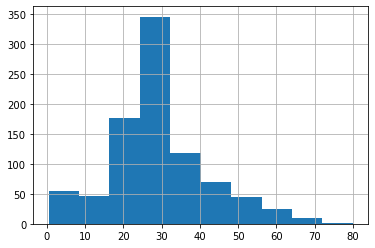

In [245]:
titanic['Age'].hist()

### Most ages are clustered from 15 to 40, so I will sub catagorize the data into smaller catagories. Catagories will be 5 year intervals.

In [246]:
titanic['age_cat']=pd.cut(titanic['Age'], bins=[15,20,25,30,35,40,np.inf], labels=[1,2,3,4,5,6])

### Removing empty rows

In [247]:
titanic.dropna(subset=['age_cat'], inplace=True)

In [248]:
titanic.to_csv('updated_titanic.csv', index=False)

#### Displaying the new Data

<AxesSubplot:>

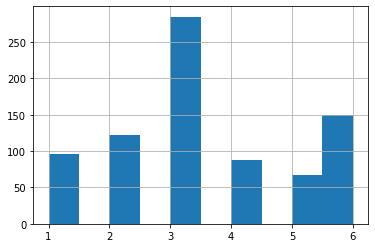

In [249]:
titanic['age_cat'].hist()

In [250]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  808 non-null    int64   
 1   Survived     808 non-null    int64   
 2   Pclass       808 non-null    int64   
 3   Age          808 non-null    float64 
 4   SibSp        808 non-null    int64   
 5   Parch        808 non-null    int64   
 6   Fare         808 non-null    float64 
 7   Sex_male     808 non-null    uint8   
 8   Embarked_Q   808 non-null    uint8   
 9   Embarked_S   808 non-null    uint8   
 10  age_cat      808 non-null    category
dtypes: category(1), float64(2), int64(5), uint8(3)
memory usage: 53.9 KB


In [251]:
from sklearn.model_selection import train_test_split
strat_training_set, strat_test_set=train_test_split(titanic, test_size=0.2, stratify=titanic['age_cat'], random_state=42)


In [252]:
strat_training_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 646 entries, 592 to 436
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  646 non-null    int64   
 1   Survived     646 non-null    int64   
 2   Pclass       646 non-null    int64   
 3   Age          646 non-null    float64 
 4   SibSp        646 non-null    int64   
 5   Parch        646 non-null    int64   
 6   Fare         646 non-null    float64 
 7   Sex_male     646 non-null    uint8   
 8   Embarked_Q   646 non-null    uint8   
 9   Embarked_S   646 non-null    uint8   
 10  age_cat      646 non-null    category
dtypes: category(1), float64(2), int64(5), uint8(3)
memory usage: 43.1 KB


## Correlation between Survival and Other Variables

### Survival on X axis. Lefft of graph is those who didnt survive. Right of graph is those who did survive. Using a density plot to better show overlapping points

In [253]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
 

In [254]:
titanic_new=strat_training_set.copy()

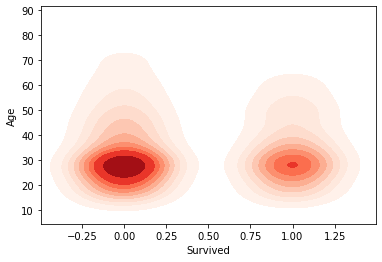

In [255]:
# 2D density plot:
sns.kdeplot(data = titanic_new, x="Survived", y='Age', cmap='Reds', shade=True)
plt.show()

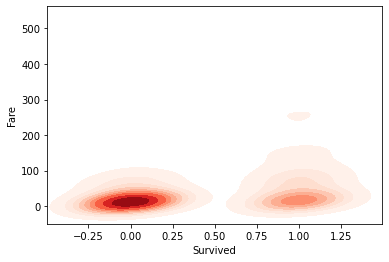

In [256]:
# 2D density plot:
sns.kdeplot(data = titanic_new, x="Survived", y='Fare', cmap='Reds', shade=True)
plt.show()

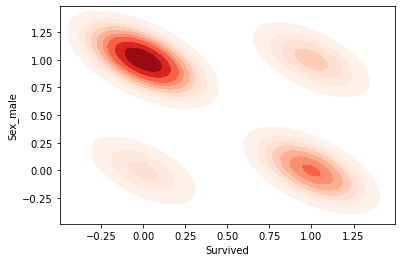

In [257]:
# 2D density plot:
sns.kdeplot(data = titanic_new, x="Survived", y='Sex_male', cmap='Reds', shade=True)
plt.show()

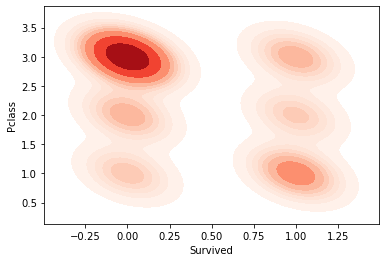

In [258]:
# 2D density plot:
sns.kdeplot(data = titanic_new, x="Survived", y='Pclass', cmap='Reds', shade=True)
plt.show()

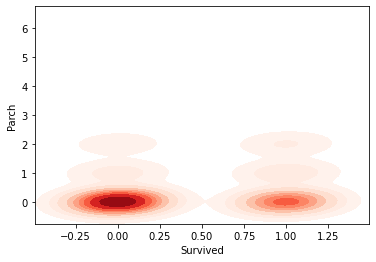

In [259]:
# 2D density plot:
sns.kdeplot(data = titanic_new, x="Survived", y='Parch', cmap='Reds', shade=True)
plt.show()

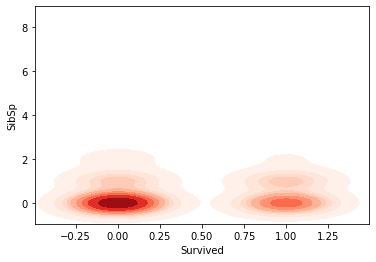

In [260]:
# 2D density plot:
sns.kdeplot(data = titanic_new, x="Survived", y='SibSp', cmap='Reds', shade=True)
plt.show()

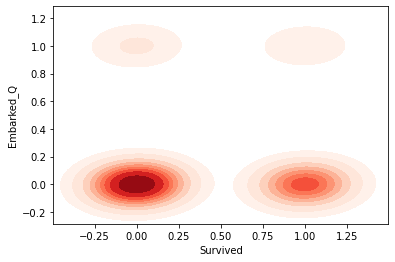

In [261]:
# 2D density plot:
sns.kdeplot(data = titanic_new, x="Survived", y='Embarked_Q', cmap='Reds', shade=True)
plt.show()

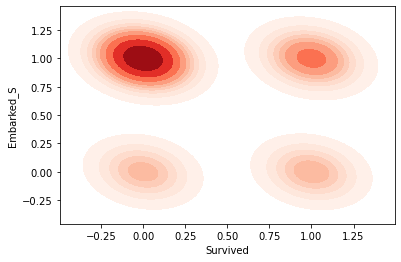

In [262]:
# 2D density plot:
sns.kdeplot(data = titanic_new, x="Survived", y='Embarked_S', cmap='Reds', shade=True)
plt.show()

## Conclusion
#### Some results I am seeing from the graphs is that `Fare` had to do with survival rate. People who paid more money seemed to have survived. Getting a rough look at the graph it seems those who paid above 150$ all survived.

#### Another graph worth pointing out is `Sex_male.` The graph is significantly more concentrated on those who died and were male than those who died and were not male. Vice versa on the survived part of the graph, the female section is much more dense than the male

### One thing I found suprising was the `Age` graph. I was right in assuming that the younger people generally survived more than the older people, but it is not as much as a difference as I initially thought